In [51]:
import torch
import torch.nn as nn

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns

import re
import string

#### NLPs
***
- NLP (Natural Language Processing) is a machine learning model that is used to read and understand text

#### Process of NLP Implementation
***
1. Loading the data
2. Preprocessing
3. Tokenization
4. Word Embedding
5. Implementing Recurrent Neural Network
6. Hyperparameter Training 

#### 1. Loading the Data
***
- Going to be using IMDBs movie review dataset
- Using `Pandas` to read through csv file

In [43]:
imdb_data = pd.read_csv(r"C:\Users\Brand\project_env\PyTorch-Fundamentals\PyTorch Recurrent Neural Network\data\IMDB Dataset.csv")

In [44]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
def sentiment_converter(value):
    if value == "positive":
        return 1
    else:
        return 0

imdb_data.sentiment = imdb_data.sentiment.apply(sentiment_converter)

<Axes: xlabel='sentiment', ylabel='count'>

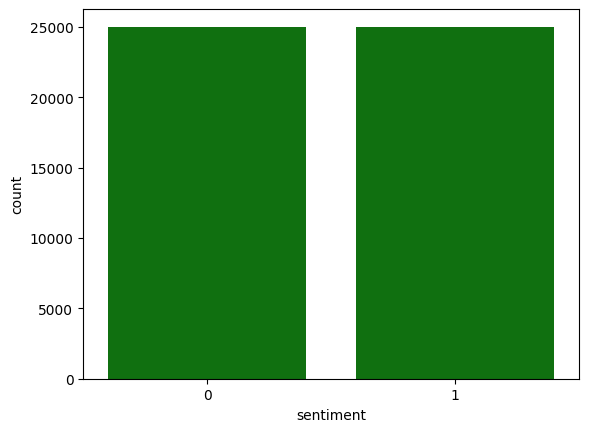

In [54]:
sns.barplot(imdb_data.sentiment.value_counts(), color="green")

#### 2. Preprocessing of an NLP
***
- lowercasing words and removing html tags or punctuations
- Tokenization breaks a sentence into individual units of words or phrases. 
- Stemming and lemmatization simplify words into their root form. For example, these processes turn "starting" into "start." 
- Stop word removal ensures that words that do not add significant meaning to a sentence, such as "for" and "with," are removed


Step by Step Process of Text Preprocessing: [GeekByGeek Text Preprocessing Tutorial](https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/)

In [18]:
stop_words = stopwords.words('english')
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

def text_preprocess(sen):
    
    sen = sen.lower()
        
    # Remove html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
        
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [10]:
test_sentence = imdb_data.review.iloc[0]
test_sentence

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [26]:
port_stemmer = PorterStemmer()

cleaned_sentence = text_preprocess(test_sentence)
cleaned_sentence

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [64]:

list(set(word_tokenize(cleaned_sentence)))

['would',
 'glass',
 'scuffles',
 'shady',
 'nickel',
 'say',
 'ever',
 'gangstas',
 'oswald',
 'cells',
 'stares',
 'latinos',
 'away',
 'show',
 'section',
 'pretty',
 'focuses',
 'get',
 'security',
 'inwards',
 'mess',
 'graphic',
 'levels',
 'mannered',
 'lack',
 'darker',
 'nasty',
 'privacy',
 'death',
 'forget',
 'exactly',
 'watched',
 'pictures',
 'uncomfortable',
 'timid',
 'emerald',
 'class',
 'word',
 'become',
 'brutality',
 'middle',
 'thats',
 'classic',
 'mainstream',
 'shows',
 'city',
 'dare',
 'taste',
 'due',
 'appeal',
 'injustice',
 'high',
 'given',
 'far',
 'order',
 'bitches',
 'may',
 'irish',
 'violence',
 'got',
 'around',
 'first',
 'regards',
 'turned',
 'never',
 'watching',
 'hearted',
 'main',
 'mentioned',
 'guards',
 'experience',
 'one',
 'saw',
 'goes',
 'street',
 'home',
 'mainly',
 'thing',
 'muslims',
 'developed',
 'christians',
 'ready',
 'prison',
 'pulls',
 'nickname',
 'italians',
 'hardcore',
 'aryans',
 'punches',
 'scenes',
 'fronts',


#### 3. Tokenizing Word

- Corpus:
- Word Indexing: 

1. Types of Tokenization

In [ ]:
[port_stemmer.stem(word) for word in word_tokenize(cleaned_sentence)]

In [74]:
def vocab(data):
    vocab_list = []
    for word in [word_tokenize(text_preprocess(data.review.iloc[i])) for i in range(len(data))]:
        vocab_list.extend(word)

    return list(set(list(vocab_list)))

vocab_data = vocab(imdb_data)

In [76]:
def one_hot_encoder(vocab_data):
    one_hot_values = {}
    bigram_one_hot_list = []
    for i, key in enumerate(vocab_data):
        one_hot_values[key] = i + 1

    return one_hot_values

one_hot_encoder(vocab_data)

{'burkewaite': 1,
 'snags': 2,
 'pediatrician': 3,
 'obliterate': 4,
 'julius': 5,
 'bibi': 6,
 'tubal': 7,
 'metephorically': 8,
 'ferrigno': 9,
 'grandeurs': 10,
 'direly': 11,
 'slighter': 12,
 'hm': 13,
 'mildew': 14,
 'herb': 15,
 'tbi': 16,
 'mythic': 17,
 'chilklis': 18,
 'addendum': 19,
 'accidently': 20,
 'phoebe': 21,
 'jongchan': 22,
 'rausch': 23,
 'raye': 24,
 'authenic': 25,
 'rapper': 26,
 'pigtailed': 27,
 'canova': 28,
 'actualize': 29,
 'storybooks': 30,
 'policial': 31,
 'illiterate': 32,
 'explained': 33,
 'impressionistic': 34,
 'rhonda': 35,
 'freebasing': 36,
 'tricheurs': 37,
 'tidied': 38,
 'templates': 39,
 'zantai': 40,
 'yachting': 41,
 'smallweed': 42,
 'gleamed': 43,
 'honkers': 44,
 'heckles': 45,
 'outset': 46,
 'informant': 47,
 'conte': 48,
 'curtly': 49,
 'italics': 50,
 'micklewhite': 51,
 'ecole': 52,
 'overwhelms': 53,
 'mainframes': 54,
 'beastie': 55,
 'bainbridge': 56,
 'jeremy': 57,
 'meadows': 58,
 'eats': 59,
 'nobodies': 60,
 'hypoth': 61,
 

In [77]:
len(vocab_data)

101243